# Los modelos pre entrenados y su numero de parámetros segun el paper EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks

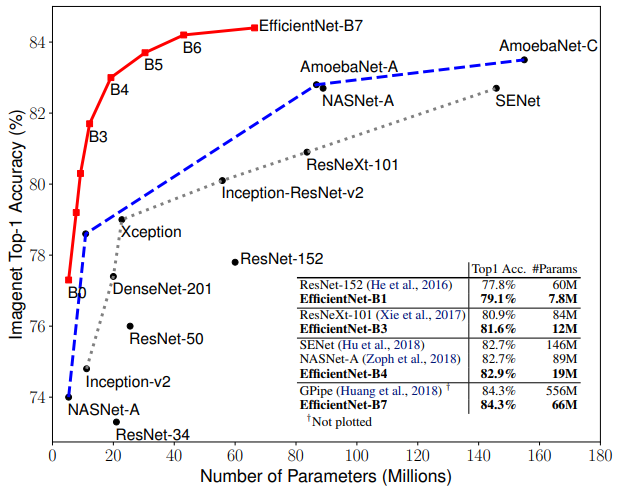

EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks
https://arxiv.org/pdf/1905.11946.pdf


Transfer learning & fine-tuning
https://keras.io/guides/transfer_learning/


Libreria EfficientNetB0
https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet/EfficientNetB0

Ejemplo del uso
https://www.tensorflow.org/tutorials/load_data/video


https://keras.io/guides/transfer_learning/
https://colab.research.google.com/github/keras-team/keras-io/blob/master/guides/ipynb/transfer_learning.ipynb#scrollTo=N20moOa9o0SX


Transfer Learning Using Keras(ResNet-50)| Complete Python Tutorial|
https://www.youtube.com/watch?v=JcU72smpLJk

https://github.com/nachi-hebbar/Transfer-Learning-ResNet-Keras


Transfer Learning with pretrained VGG16 | How to do transfer learning? | Deep Learning
https://www.youtube.com/watch?v=AwOIgOwaLl0


https://github.com/datamagic2020/transfer-learning-with-VGG16
Image Classification using Transfer Learning in Deep Learning | VGG19 model
https://www.youtube.com/watch?v=dD46iprINX4



------ Del notebook eliminado (polillas.ipynb)

Algunos otros proyectos utilizan la Pre-entrenada e Xception

- https://medium.com/analytics-vidhya/image-recognition-using-pre-trained-xception-model-in-5-steps-96ac858f4206
- https://medium.com/@nutanbhogendrasharma/image-classification-with-xception-model-e8094a9de4d2

debemos entender como utilizarlo y crear un mejor cuaderno.x

Usar EfficientNetB0
https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet/EfficientNetB0

Transfer Learning and fine tuning
https://www.tensorflow.org/tutorials/images/transfer_learning?hl=es-419

para utilizar el dataset se accede a la carpeta superior llamada 'data_papillons'

vamos a usar como base los links:

Utilizando el siguiente modelo que logra un 97.2 % de accuracy 
[Modelo en Kaggle](https://www.kaggle.com/code/shinhaijin/image-classification-with-cnn-97-2-accuracy)

y 

[Butterfly & Moths Image Classification 100 species](https://www.kaggle.com/datasets/gpiosenka/butterfly-images40-species/code)

## Comenzaremos haciendo la exploracion de datos

In [6]:
import pandas as pd

df = pd.read_csv('../../data_papillons/butterflies and moths.csv')

print(df.head().to_string()) 

   class id             filepaths  labels data set
0         0  train/ADONIS/001.jpg  ADONIS    train
1         0  train/ADONIS/002.jpg  ADONIS    train
2         0  train/ADONIS/003.jpg  ADONIS    train
3         0  train/ADONIS/004.jpg  ADONIS    train
4         0  train/ADONIS/005.jpg  ADONIS    train


Leyendo las carpetas de datos de prueba y las imagenes

In [7]:
df = pd.read_csv('../../data_papillons/butterflies and moths.csv')  
IMAGE_DIR = '../../data_papillons'
df['filepaths'] = IMAGE_DIR + '/' + df['filepaths']
df.head()

,class id,filepaths,labels,data set
0,0,../../data_papillons/train/ADONIS/001.jpg,ADONIS,train
1,0,../../data_papillons/train/ADONIS/002.jpg,ADONIS,train
2,0,../../data_papillons/train/ADONIS/003.jpg,ADONIS,train
3,0,../../data_papillons/train/ADONIS/004.jpg,ADONIS,train
4,0,../../data_papillons/train/ADONIS/005.jpg,ADONIS,train


Dividimos los datos en diferentes objetos

In [8]:
train_df = df.loc[df['data set'] == 'train']
val_df = df.loc[df['data set'] == 'valid']
test_df = df.loc[df['data set'] == 'test']

In [9]:
## Data ## 
import numpy as np
import pandas as pd 
import os 

## Visualization ## 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
# importamos librerias de visualizacion y de manipulacion de datos


- Obtenemos las 10 etiquetas mas comunes en el set de datos

In [10]:
label_counts = df['labels'].value_counts()[:10]

fig = px.bar(x=label_counts.index, 
             y=label_counts.values,
             color=label_counts.values,
             text=label_counts.values,
             color_continuous_scale='Blues')

fig.update_layout(
    title_text='Top 10 Labels Distribution',
    template='plotly_white',
    xaxis=dict(
        title='Label',
    ),
    yaxis=dict(
        title='Count',
    )
)

fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)
 
fig

In [11]:
#importamos librerias de imagenes
## Image ## 
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

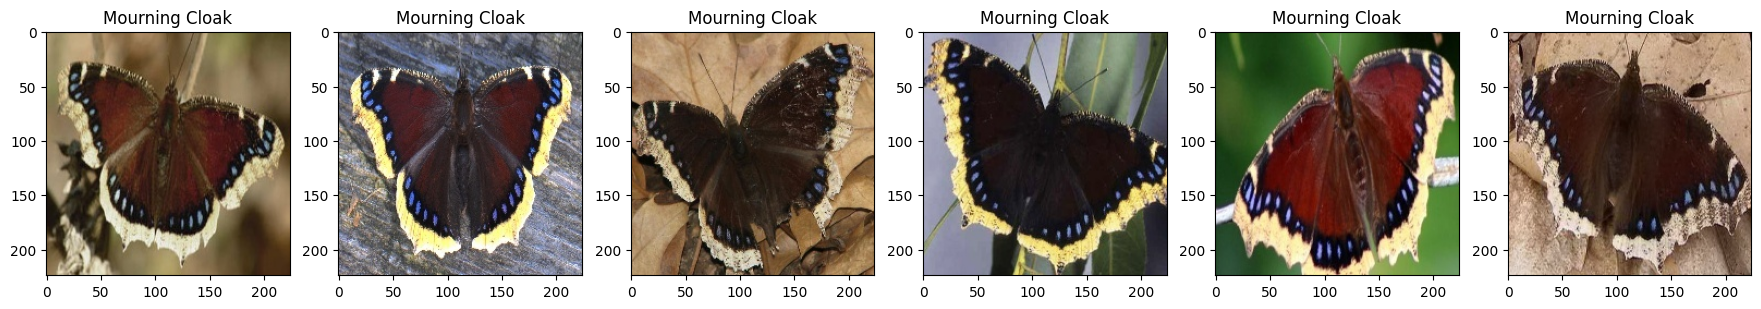

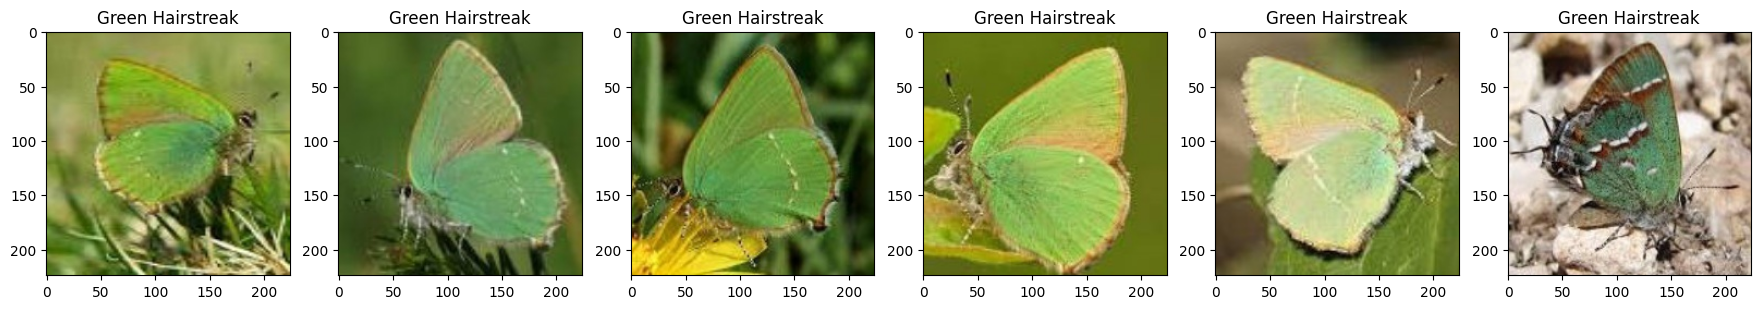

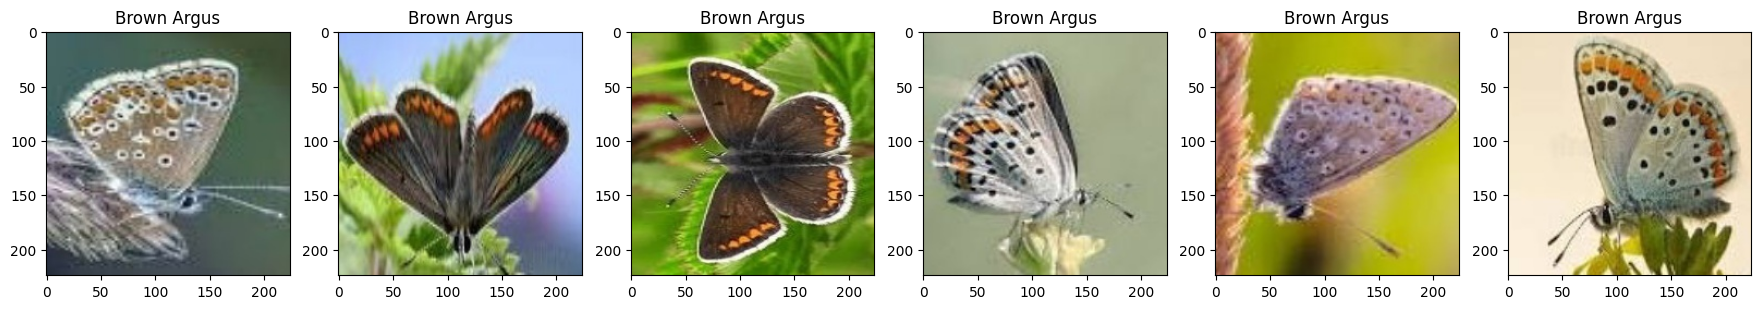

In [12]:
# Creamos una funcion para mostrar un grid/mosaico con las imagenes
def show_grid_images(image_path_list, ncols, title, augmentor=None):
    figure, axs = plt.subplots(figsize=(22,4), nrows=1, ncols=ncols)
    for i in range(ncols):
        image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_BGR2RGB)
        if augmentor is not None:
            image = augmentor(image=image)['image']
        axs[i].imshow(image)
        axs[i].set_title(title)
    plt.show()
    
# Visualize top 3 most distributed dataset images
top3_labels = label_counts[:3].index.tolist()

cloak_image_list = df.loc[df['labels']==top3_labels[0]]['filepaths'].iloc[:6].tolist()
hairstreak_image_list = df.loc[df['labels']==top3_labels[1]]['filepaths'].iloc[:6].tolist() 
argus_image_list = df.loc[df['labels']==top3_labels[2]]['filepaths'].iloc[:6].tolist()

show_grid_images(cloak_image_list, ncols=6, title='Mourning Cloak')
show_grid_images(hairstreak_image_list, ncols=6, title='Green Hairstreak')
show_grid_images(argus_image_list, ncols=6, title='Brown Argus')

Trataremos la data y definiremos los pixeles de las imagenes/input

In [13]:
# only train data needs to be augmented 
train_gen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rescale=1/255.)
val_gen = ImageDataGenerator(rescale=1/255.)

train_dir = '../../data_papillons/train'
val_dir = '../../data_papillons/valid'

BATCH_SIZE = 64
SEED = 56
IMAGE_SIZE = (244, 244)

train_flow_gen = train_gen.flow_from_directory(directory=train_dir,
                                              class_mode='sparse',
                                              batch_size=BATCH_SIZE,
                                              target_size=IMAGE_SIZE,
                                              seed=SEED)

val_flow_gen = val_gen.flow_from_directory(directory=val_dir,
                                            class_mode='sparse',
                                            batch_size=BATCH_SIZE,
                                            target_size=IMAGE_SIZE,
                                            seed=SEED)

Found 12594 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


- Se crean modelos con distindos transfer learning

In [14]:
## Remove Warnings ## 
import warnings
warnings.filterwarnings("ignore")

## Tensorflow ## 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception

- Creando modelos

In [15]:
def create_model(model_name, verbose=False):
    
    input_tensor = Input(shape=(224, 224, 3))
    
    if model_name == 'resnet50':
        base_model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        base_model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    
    bm_output = base_model.output

    x = GlobalAveragePooling2D()(bm_output)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(rate=0.5)(x)
    output = Dense(100, activation='softmax')(x)
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
        
    return model

xception_model = create_model(model_name='xception', verbose=False)
xception_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, mode='min', verbose=0)
early_cb = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=0)

2023-12-06 05:48:14.171663: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


- Entrenando modelos ,  15 epochs (creo que exceeds 10% of free system memory)

In [16]:
#xception_model.fit(train_flow_gen, epochs=15,
#         steps_per_epoch=int(np.ceil(train_df.shape[0]/BATCH_SIZE)),
#         validation_data=val_flow_gen,
#         validation_steps=int(np.ceil(val_df.shape[0]/BATCH_SIZE)),
#         callbacks=[rlr_cb, early_cb])

dice que nelson por el espacio no se puede aqui

In [17]:
#importamos ImageData
from keras.preprocessing.image import ImageDataGenerator

In [18]:
test_dir = '../../data_papillons/test'
test_gen = ImageDataGenerator(rescale=1/255.)
test_flow_gen = test_gen.flow_from_directory(directory=test_dir,
                                             class_mode='sparse',
                                             batch_size=BATCH_SIZE,
                                             target_size=IMAGE_SIZE,
                                             seed=SEED)

Found 500 images belonging to 100 classes.


In [19]:
print('Xception Test Data Accuracy: {0}'.format(xception_model.evaluate(test_flow_gen)[1:][0]))

2023-12-06 05:48:24.216243: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 232013824 exceeds 10% of free system memory.
2023-12-06 05:48:25.295803: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 232013824 exceeds 10% of free system memory.
2023-12-06 05:48:25.678164: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 464027648 exceeds 10% of free system memory.
2023-12-06 05:48:26.388525: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 464027648 exceeds 10% of free system memory.
2023-12-06 05:48:26.829875: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 464027648 exceeds 10% of free system memory.


8/8 [==============================] - 181s 22s/step - loss: 4.6382 - accuracy: 0.0160
Xception Test Data Accuracy: 0.01600000075995922


- Aqui al no poder usar el modelo entrenado arriba debería poder importar un modelo pre-entrenado .h5 y utilizarlo en el dataset que fue creado, los resultados corresponden al uso de un modelo creado y sin el entrenamiento (parte comentada 15 epochs)

-----------------------
--------------------------
-------------------------
---------------------------


The is an EfficientNetB0 trained model. Itwas trained on 224 X 224 X 3 jpg images. Augmentation was used soeach class in the train set contained 200 images. The model was trained for 15 epochs and achievd an F1 score on the test set fo 97.59%. Note if you wish to use this model, to load the model use the code

model= keras.models.load_model('../../data_papillons/EfficientNetB0-100-(224 X 224)- 97.59', custom_objects={'F1_score':'F1_score'})

In [20]:
# model= keras.models.load_model('../../data_papillons/EfficientNetB0-100-(224 X 224)- 97.59', custom_objects={'F1_score':'F1_score'})